<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Benford's Law

_Authors: Riley Dallas (AUS)_

---
<a id="learning-objectives"></a>

### Learning Objectives

- Understand what Benford's law is
- Use Benford's law to find anomalies within a dataset.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', 999)

# About Benford's Law

> Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on. - From [Wikipedia](https://en.wikipedia.org/wiki/Benford%27s_law)

Benford's law has many great applications in exploratory data analysis. To give an example, forensic accountants typically use Benford's law to screen for irregularities in financial reports. Financial datasets tend to follow Benford's law **unless human intervention is involved**, which can sometimes lead to fraud.

For today's lesson, we'll apply Benford's law to the [City of Austin's Online eCheckbook](https://data.austintexas.gov/Budget-and-Finance/Austin-Finance-Online-eCheckbook/8c6z-qnmj/data) to explore anomolies in the data.

## Challenge

For digits 1-9, create a bar chart that shows the expected percentage of first digits in the dataset according to Benford's law:

$P(d)=\log_{10}(d+1)-\log_{10}(d)=\log_{10} \left(\frac{d+1}{d}\right)=\log_{10} \left(1+\frac{1}{d}\right)$

For example, we expect to see numbers with a 1 as the first digit roughly 30% of the time:

$P(d)=\log_{10}(1+1)-\log_{10}(1) = .301$

In [1]:
digits = list(range(1, 10))

In [3]:
np.log10(1 + 1 / 2)

0.17609125905568124

In [5]:
def benford_prob(d):
    return(np.log10(1 + 1 / d))

In [6]:
bexpected = [benford_prob(d) for d in digits]

In [139]:
bexpected

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829993,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

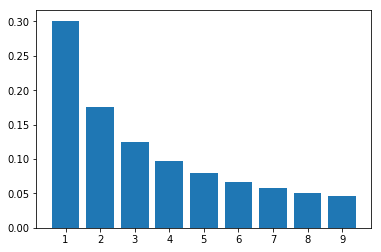

In [8]:
plt.bar(digits, bexpected)
plt.xticks(digits);

## Load in the dataset

We've already downloaded a csv from the City of Austin's website (`datasets/Austin_Finance_Online_eCheckbook.csv`). Load that into a `pandas` DataFrame.

In [9]:
df = pd.read_csv('./datasets/Austin_Finance_Online_eCheckbook.csv')

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH
0,2017,3,62,Public Works - Transportation,5120,Transportation Fund,2SPM,Street Preventive Maintenance,2ASP,Asphalt Overlay,154,Commodities,7600,Small tools/minor equipment,D & A WIRE ROPE INC,DAW7009930,V,PRM,6200,16121206643,07587,Tow Bars and Chains,12/15/0016,Paid,1,1,1,PO,6200.0,16112900695,Tow Bars and Chains,1301.35,2016,12
1,2017,10,81,Aviation,5070,Airport Operating Fund,4FOP,"Facilities Management, Operations and Airport ...",4MAX,MaxAdmin,154,Commodities,7730,Inventory purchases,PATHMARK TRAFFIC PRODUCTS,PAT7004575,V,PRM,8100,17070526835,8013059,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",07/08/0017,Paid,1,1,1,PO,8100.0,17061302669,"PARTS AND ACCESSORIES, SIGN POST (MISC.)",466.25,2017,7
2,2017,12,11,Austin Energy,3230,E-Transmission Capital,2900,Fy2001 Transmission Parent,TRAN,Transmission,154,Commodities,7117,Cement/concrete,LAUREN CONCRETE LP,LAU2825500,V,PRC,1100,MAX53835,7507002,"CONCRETE, READY-MIX",09/22/0017,Paid,1,1,1,DOM,1100.0,MAX66734,"CONCRETE, READY-MIX",816.00,2017,9
3,2017,12,72,Neighborhood Housing & Community Development,6141,US Housing/Urban Development-Lead,1HSG,Housing,2HOA,Homeowner Assistance,152,Contractuals,5560,Services-construction contr,VALDEZ REMODELING & WEATHERIZATION INC,VAL7050710,V,PRM,7200,17090532599,92658,Lead and Asbestos Inspection Services,09/08/0017,Paid,1,1,1,DO,7200.0,17073114210,Lead and Asbestos Inspection Services,14793.71,2017,9
4,2017,2,22,Austin Water,5020,Water Utility Operating Fund,TRMT,Treatment,TWTR,Water Operations,154,Commodities,7601,Safety equipment,ALLAN BAKER INC,ALL8305442,V,PRM,2200,16112805225,34564,"Head, Ear, Eye and Face Protection",12/01/0016,Paid,1,1,1,DO,2200.0,16072616990,"Head, Ear, Eye and Face Protection",100.00,2016,11


## Remove all rows where the `AMOUNT` is less than 10 dollars

In [11]:
df = df[df['AMOUNT'] >= 10]

## Add a `FIRST_DIGIT` category

Create a column called `FIRST_DIGIT` corresponding to the first digit from the `AMOUNT` column.

In [23]:
str(df['AMOUNT'][0])[0]

'1'

In [24]:
df['FIRST_DIGIT'] = df['AMOUNT'].map(lambda x: int(str(x)[0]))

## Actuals vs Expected

Next we'll plot a line chart of actual percentages against the expected Benford percentages as a bar chart.

In [39]:
for i,vals in checkvals.index,checkvals.values:
    print(vals)

ValueError: too many values to unpack (expected 2)

In [36]:
checkvals.values

array([0.30479701, 0.17312659, 0.12943782, 0.09563375, 0.0839017 ,
       0.0639572 , 0.06133063, 0.0462453 , 0.04156999])

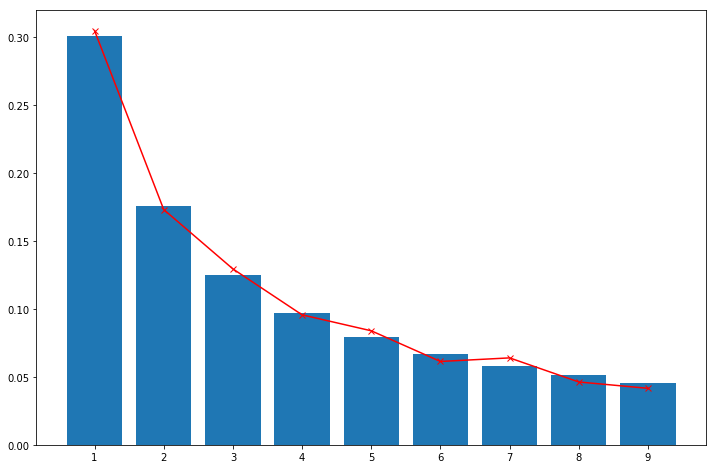

In [45]:
checkvals = df['FIRST_DIGIT'].value_counts().sort_index()/len(df)

plt.figure(figsize=(12, 8))
plt.bar(digits, bexpected, alpha=1)
plt.plot(digits, checkvals, c='r', marker='x')
plt.xticks(digits);

## Evaluating Benford's Law by Department

Now we'll plot actuals vs expected for each of the major deparments. 

From the original dataset, let's create a list of deparment names that have written at least 1,000 checks.

In [58]:
dept_counts = df.groupby('DEPT_NM').count()[['AMOUNT']].sort_values('AMOUNT', ascending=False)

In [57]:
#dept_counts = df['DEPT_NM'].value_counts()

In [59]:
large_dept_counts = dept_counts[dept_counts['AMOUNT'] > 1000]

In [92]:
large_dept_counts['AMOUNT'][0]

21417

In [102]:
df[df['DEPT_NM'] == large_dept_counts.index[0]]['FIRST_DIGIT'].value_counts().sort_index() / large_dept_counts['AMOUNT'][0]

1    0.308540
2    0.159873
3    0.128449
4    0.113695
5    0.081057
6    0.065929
7    0.053742
8    0.046505
9    0.042209
Name: FIRST_DIGIT, dtype: float64

In [96]:
df[df['DEPT_NM'] == large_dept_counts.index[0]]['FIRST_DIGIT'].value_counts().sort_index() / large_dept_counts['AMOUNT'][0]

1    0.308540
2    0.159873
3    0.128449
4    0.113695
5    0.081057
6    0.065929
7    0.053742
8    0.046505
9    0.042209
Name: FIRST_DIGIT, dtype: float64

Now we'll plot actuals vs expected for each of those departments

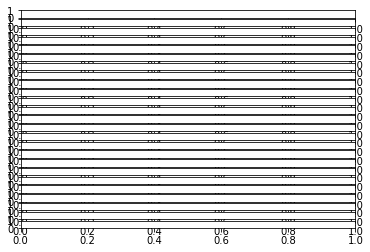

In [60]:
fig, ax = plt.subplots(ncols=1, nrows=len(large_dept_counts))
for row in large_dept_counts:
    plt.bar(digits, bexpected, alpha=1)
    plt.plot(digits, checkvals, c='r', marker='x')
    plt.xticks(digits);

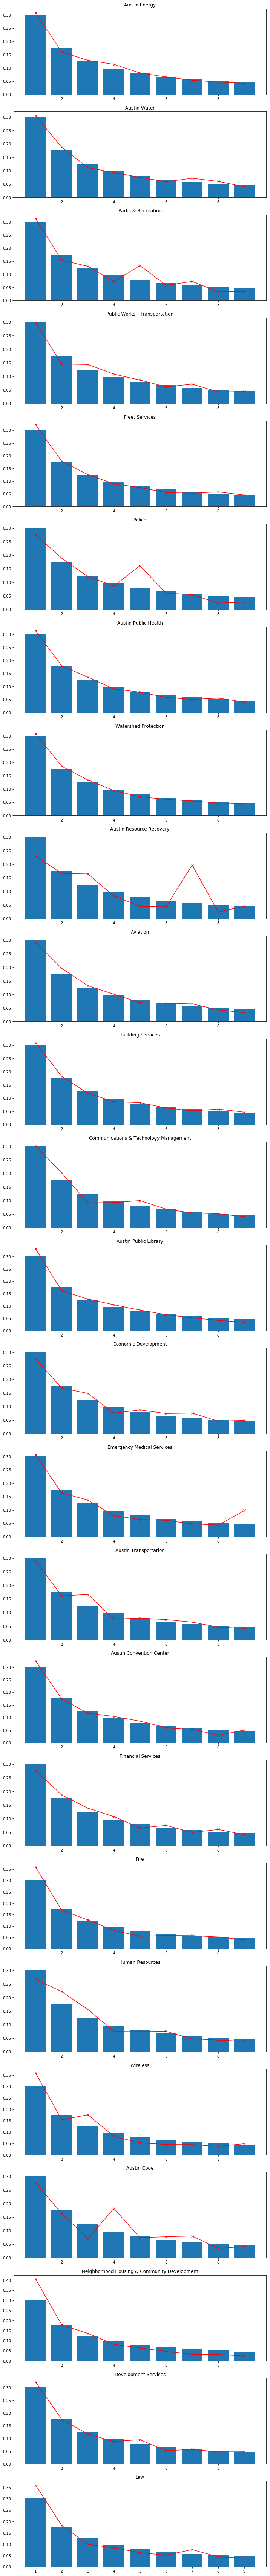

In [108]:
fig, ax = plt.subplots(ncols=1, nrows=len(large_dept_counts), figsize=(12, 5 * len(large_dept_counts)))
plt.xticks(digits);
for i, dept in enumerate(large_dept_counts.index):
    ax[i].set_title(dept)
    ax[i].bar(digits, bexpected)
    actuals = df.loc[df['DEPT_NM'] == dept, 'FIRST_DIGIT'].value_counts(normalize=True).sort_index()
    ax[i].plot(digits, actuals.values, color='r', marker='x')
    
#    plt.bar(digits, bexpected)
#    plt.bar(digits, df[df['DEPT_NM'] == large_dept_counts.index[i]]['FIRST_DIGIT'].value_counts().sort_index() / large_dept_counts['AMOUNT'][i]

## Deep dive

We can see a few anomalies with Police, EMS, Austin Resource Recovery and Parks & Rec. Let's dig deeper and investigate the root causes. For this exercise, pick a department that is deviating from Benford's law and find out why.

In [110]:
df[(df['DEPT_NM'] == 'Emergency Medical Services') & (df['FIRST_DIGIT'] == 9)]

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT
18784,2017,3,93,Emergency Medical Services,1000,General Fund,5BSV,Billing Services,5BLS,Billing Services,152,Contractuals,5564,Services-collection costs,GILA LLC,MUN3346250,V,PRM,9300,16122908629,94633,Collection Services,01/01/0017,Paid,1,1,1,DO,9300.0,16100700736,Collection Services,9271.38,2016,12,9
23073,2017,11,93,Emergency Medical Services,1000,General Fund,4TED,Safety and Performance Improvement,4QAS,Safety and Performance Management,152,Contractuals,6551,Mileage reimbursements,"VON WUPPERFELD, MICHAEL",MIS0000024,V,TPP,9300,17082105769,NaN,NaN,09/01/0017,Paid,1,0,1,NaN,NaN,NaN,Mileage reimbursements,94.17,2017,8,9
24391,2017,9,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,154,Commodities,7425,Medical/dental supplies,"MIDWEST MEDICAL SUPPLY COMPANY, LLC",MMS8320658,V,PRM,9300,17061324909,47587775003,A122.01 Endotracheal Tube. Intoducer 10 fr 70...,06/16/0017,Paid,1,1,1,PO,9300.0,17052402533,A122.01 Endotracheal Tube. Intoducer 10 fr 70...,92.60,2017,6,9
38569,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"PALMER, BRANDON",MIS0000024,V,GAX,9300,17091119706,NaN,NaN,09/21/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.00,2017,9,9
41694,2017,1,93,Emergency Medical Services,1020,General Fund Inventory Fund,9MGT,Support Services,9ADM,Departmental Support Services,154,Commodities,7730,Inventory purchases,"MIDWEST MEDICAL SUPPLY COMPANY, LLC",MMS8320658,V,PRM,9300,16101801597,27067295080,M010 Baby Aspirin Major 0904-4040-73 Children,10/21/0016,Paid,1,10,1,DO,9300.0,16071516416,M010 Baby Aspirin Major 0904-4040-73 Children,90.00,2016,10,9
42198,2017,12,93,Emergency Medical Services,1000,General Fund,4ESW,Employee Development and Wellness,4ACA,Staff Development,152,Contractuals,5720,Services-temporary employme,Joseph Edgar Bousquet,VS0000005142,V,GAX,9300,17090619531,NaN,NaN,09/14/0017,Paid,1,0,2,NaN,NaN,NaN,Services-temporary employme,97.50,2017,9,9
42266,2017,12,93,Emergency Medical Services,1000,General Fund,4ESW,Employee Development and Wellness,4ACA,Staff Development,152,Contractuals,5720,Services-temporary employme,Joseph Edgar Bousquet,VS0000005142,V,GAX,9300,17091119710,NaN,NaN,09/22/0017,Paid,1,0,2,NaN,NaN,NaN,Services-temporary employme,97.50,2017,9,9
42803,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"WIGGIIN, STUART ANDREW",MIS0000024,V,GAX,9300,17082218791,NaN,NaN,09/01/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.00,2017,8,9
43246,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6389,Maintenance-other equipment,FITNESS IN MOTION,FIT7140500,V,PRM,8300,17092635071,93111,Athletic and Sporting Goods Equipment and Acce...,09/29/0017,Paid,1,1,1,DO,8300.0,17072614038,Athletic and Sporting Goods Equipment and Acce...,998.80,2017,9,9
44534,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,154,Commodities,7425,Medical/dental supplies,HENRY SCHEIN INC,HEN8311513,V,PRM,9300,17092534900,47562390002,G030 Scrub Top. Disposable MEDIUM,09/28/0017,Paid,1,1,1,PO,9300.0,17082503348,G030 Scrub Top. Disposable MEDIUM,96.50,2017,9,9


In [115]:
df[(df['DEPT_NM'] == 'Emergency Medical Services') & (df['ACTG_LN_DSCR'] == 'Government permits and fees')]

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT
38569,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"PALMER, BRANDON",MIS0000024,V,GAX,9300,17091119706,NaN,NaN,09/21/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,9,9
42803,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"WIGGIIN, STUART ANDREW",MIS0000024,V,GAX,9300,17082218791,NaN,NaN,09/01/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,8,9
44985,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"BOSTICK, KENNETH WAYNE",MIS0000024,V,GAX,9300,17080717949,NaN,NaN,08/18/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,8,9
45555,2017,10,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"SCHILLER, STEPHEN A",MIS0000024,V,GAX,9300,17063016061,NaN,NaN,07/13/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,7,9
45755,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"PARCH, BRIAN CHRISTIAN",MIS0000024,V,GAX,9300,17091119707,NaN,NaN,09/21/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,9,9
45756,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"KENNEDY, ELIZABETH JADE",MIS0000024,V,GAX,9300,17090119374,NaN,NaN,09/17/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,64.0,2017,9,6
45813,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"LUCIA, RHYS MICHAEL",MIS0000024,V,GAX,9300,17080217624,NaN,NaN,08/10/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,8,9
45822,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"GERVAIS, WILLEM ADRIAAN",MIS0000024,V,GAX,9300,17080217623,NaN,NaN,08/10/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,8,9
46440,2017,11,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"CURVIN, DAVID",MIS0000024,V,GAX,9300,17082218793,NaN,NaN,09/01/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,8,9
46548,2017,12,93,Emergency Medical Services,1000,General Fund,3PST,Operations,3FLD,Emergency Field Operations,152,Contractuals,6843,Government permits and fees,"CHANG, HOWARD",MIS0000024,V,GAX,9300,17091419924,NaN,NaN,09/23/0017,Paid,1,0,1,NaN,NaN,NaN,Government permits and fees,96.0,2017,9,9


In [114]:
91 / 	2465

0.03691683569979716

In [116]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                index=[4, 5, 6], columns=['A', 'B', 'C'])

In [127]:
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [122]:
df.loc[4].at['C']

3

In [123]:
df.loc[4]

A    0
B    2
C    3
Name: 4, dtype: int64

In [124]:
df.loc[:,'C']

4     3
5     1
6    30
Name: C, dtype: int64

In [126]:
df.loc[:,:]

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [131]:
df.loc[:,'B':'C']

,B,C
4,2,3
5,4,1
6,20,30


In [134]:
df.loc[:,['A','C']]

,A,C
4,0,3
5,0,1
6,10,30


In [135]:
grid = np.array([['a','b','c','d','e','1','2','3'],
                 ['f','g','h','i','j','4','5','6'],
                 ['k','l','m','n','o','7','8','9'],
                 ['p','q','r','s','t','.','@','0'],
                 ['u','v','w','x','y','z','_','/'],
                 ['shift',' ','','','','','','']])

In [137]:
grid.shape

(6, 8)

In [138]:
grid.shape[0]

6